**환경설정**

In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os, cv2
from glob import glob
from tqdm import tqdm

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [9]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout

# DATA Read (dir)

In [4]:
# 데이터 위치
mednist_dir = 'C:/Users/Intern/Desktop/mednist/resized'

In [14]:
#데이터 안에 있는 폴더 이름
classnames = sorted(os.listdir(mednist_dir))
classnames

['AbdomenCT', 'BreastMRI', 'CXR', 'ChestCT', 'Hand', 'HeadCT']

In [17]:
#sub 폴더 갯수
numclass = len(classnames)
numclass

6

### os.path.join 
기능  : 괄호안의 지정한 path들을 순서대로 묶어 하나의 path로 만들어준다
기본 형태 : os.path.join(path1, path2, ...)



In [52]:
# sub 폴더안에 있는 파일 "모든" 이름들 
# imgfiles [0~5] 
# 0: AbdomenCT
# 1 : BreastMRO
# 2 : CXR 
# 3 : ChestCT
# 4 : Hand
# 5 : HeadCT

imgfiles = [ [os.path.join(mednist_dir, classnames[i],x)
             for x in os.listdir(os.path.join(mednist_dir, classnames[i]))]
           for i in range(numclass)]
imgfiles[5]

['C:/Users/Intern/Desktop/mednist/resized\\HeadCT\\000000.jpeg',
 'C:/Users/Intern/Desktop/mednist/resized\\HeadCT\\000001.jpeg',
 'C:/Users/Intern/Desktop/mednist/resized\\HeadCT\\000002.jpeg',
 'C:/Users/Intern/Desktop/mednist/resized\\HeadCT\\000003.jpeg',
 'C:/Users/Intern/Desktop/mednist/resized\\HeadCT\\000004.jpeg',
 'C:/Users/Intern/Desktop/mednist/resized\\HeadCT\\000005.jpeg',
 'C:/Users/Intern/Desktop/mednist/resized\\HeadCT\\000006.jpeg',
 'C:/Users/Intern/Desktop/mednist/resized\\HeadCT\\000007.jpeg',
 'C:/Users/Intern/Desktop/mednist/resized\\HeadCT\\000008.jpeg',
 'C:/Users/Intern/Desktop/mednist/resized\\HeadCT\\000009.jpeg',
 'C:/Users/Intern/Desktop/mednist/resized\\HeadCT\\000010.jpeg',
 'C:/Users/Intern/Desktop/mednist/resized\\HeadCT\\000011.jpeg',
 'C:/Users/Intern/Desktop/mednist/resized\\HeadCT\\000012.jpeg',
 'C:/Users/Intern/Desktop/mednist/resized\\HeadCT\\000013.jpeg',
 'C:/Users/Intern/Desktop/mednist/resized\\HeadCT\\000014.jpeg',
 'C:/Users/Intern/Desktop

In [25]:
# 각 sub폴더별 파일 갯수
numEach = [ len(imgfiles[i]) for i in range(numclass)]
numEach

[10000, 8954, 10000, 10000, 10000, 10000]

In [27]:
#모든 파일 이름 --> 뭉텅이로 돼있는거 풀기 
# ImgfileList[0~58954]
imgfilesList = []

#각각의 파일들에 대한 클래스
imgClass =[]

for i in range(numclass):
    imgfilesList.extend(imageFiles[i])
    imgClass.extend([i]*numEach[i])

    

In [50]:
imgfilesList[30000:30010]

['C:/Users/Intern/Desktop/mednist/resized\\ChestCT\\001046.jpeg',
 'C:/Users/Intern/Desktop/mednist/resized\\ChestCT\\001047.jpeg',
 'C:/Users/Intern/Desktop/mednist/resized\\ChestCT\\001048.jpeg',
 'C:/Users/Intern/Desktop/mednist/resized\\ChestCT\\001049.jpeg',
 'C:/Users/Intern/Desktop/mednist/resized\\ChestCT\\001050.jpeg',
 'C:/Users/Intern/Desktop/mednist/resized\\ChestCT\\001051.jpeg',
 'C:/Users/Intern/Desktop/mednist/resized\\ChestCT\\001052.jpeg',
 'C:/Users/Intern/Desktop/mednist/resized\\ChestCT\\001053.jpeg',
 'C:/Users/Intern/Desktop/mednist/resized\\ChestCT\\001054.jpeg',
 'C:/Users/Intern/Desktop/mednist/resized\\ChestCT\\001055.jpeg']

In [36]:
#전체 파일갯수
numTotal = len(imgClass)
numTotal

58954

In [41]:
from PIL import Image
# 각 데이터들의 사이즈
imgwidth, imgheight = Image.open(imgfilesList[1]).size

print( imgwidth, imgheight)

64 64


In [43]:
#데이터 리스트 살펴보기
imgfilesList[0:10]

['C:/Users/Intern/Desktop/mednist/resized\\AbdomenCT\\000000.jpeg',
 'C:/Users/Intern/Desktop/mednist/resized\\AbdomenCT\\000001.jpeg',
 'C:/Users/Intern/Desktop/mednist/resized\\AbdomenCT\\000002.jpeg',
 'C:/Users/Intern/Desktop/mednist/resized\\AbdomenCT\\000003.jpeg',
 'C:/Users/Intern/Desktop/mednist/resized\\AbdomenCT\\000004.jpeg',
 'C:/Users/Intern/Desktop/mednist/resized\\AbdomenCT\\000005.jpeg',
 'C:/Users/Intern/Desktop/mednist/resized\\AbdomenCT\\000006.jpeg',
 'C:/Users/Intern/Desktop/mednist/resized\\AbdomenCT\\000007.jpeg',
 'C:/Users/Intern/Desktop/mednist/resized\\AbdomenCT\\000008.jpeg',
 'C:/Users/Intern/Desktop/mednist/resized\\AbdomenCT\\000009.jpeg']

ValueError: num must be 1 <= num <= 9, not 10

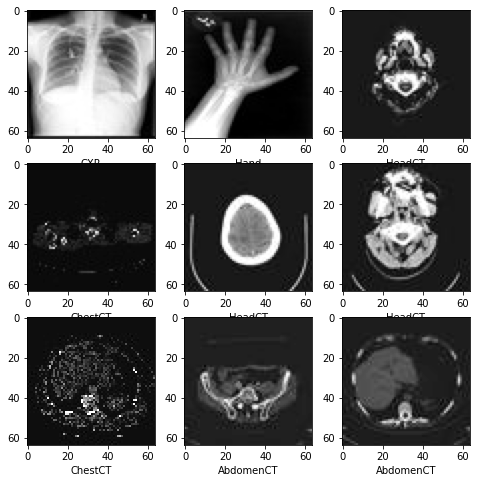

In [57]:
# 데이터 살펴보기

plt.subplots(3,3,figsize=(8,8))
for i,k in enumerate(np.random.randint(numTotal, size=10)):
    im = Image.open(imgfilesList[k])
    arr = np.array(im)
    plt.subplot(3,3, i+1)
    plt.xlabel(classnames[imgClass[k]])
    plt.imshow(arr, cmap ='gray')
plt.show()